In [1]:
# 1. Các thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression


In [2]:
# 2. Đọc file dữ liệu chứng khoán và chia train test theo tỉ lệ 8:2
df = pd.read_csv('VTB.csv')
df = df[['Price']]
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index

# Split the data into training, testing, and validation sets
train_size = int(0.8 * len(df))
test_size = int(0.2 * len(df))
# val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
# val_data = df[train_size+test_size:]

In [3]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 18.6 MB/s eta 0:00:00


In [4]:
# 3. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Price'])

# Find the best ARIMA model using auto_arima
from pmdarima.arima import auto_arima
model = auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings=True)

# Fit the model
model.fit(y_train)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=21172.731, Time=4.42 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=21180.109, Time=0.12 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=21179.230, Time=0.17 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=21179.534, Time=0.31 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=21179.260, Time=0.06 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=21172.001, Time=3.16 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=21177.094, Time=0.83 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=21169.731, Time=3.67 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=21171.983, Time=2.79 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=21176.313, Time=0.54 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=21168.958, Time=0.83 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=21178.801, Time=0.28 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=21178.506, Time=0.25 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=21170.910, Time=1.46 sec
 ARIMA(1,1,2)(0,0,0

ARIMA(order=(1, 1, 1), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [5]:
# 4. Quá trình testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Price'])
y_pred = model.predict(n_periods=len(y_test)+30)

# 5. Quá trình Validate
# x_val= np.array(val_data.index).reshape(-1, 1)
# y_val = np.array(val_data['Price'])
# y_pred_val =  model.predict(n_periods=len(y_val))

In [6]:
# 5. Quá trình tạo index predict 30 ngày tiếp theo
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
# x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
# y_next_30_days = model.predict(n_periods=len(x_next_30_days))

# Predict the closing prices for the next 30 days
y_next_30_days = y_pred[-30:]
y_pred = y_pred[:-30]

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[30467.89628736 30467.89628576 30467.89628729 30467.89628583
 30467.89628722 30467.89628589 30467.89628716 30467.89628595
 30467.8962871  30467.896286   30467.89628705 30467.89628605
 30467.89628701 30467.8962861  30467.89628696 30467.89628614
 30467.89628693 30467.89628617 30467.89628689 30467.89628621
 30467.89628686 30467.89628624 30467.89628683 30467.89628626
 30467.8962868  30467.89628629 30467.89628678 30467.89628631
 30467.89628676 30467.89628633]


In [7]:
# 6. Đánh giá độ chính xác test
# valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('RMSE:', test_rmse)


RMSE: 3984.5864534773445


Testing RMSE: 3984.5864534773445
Mean Absolute Error (MAE): 3312.6869315672693
Mean Absolute Percentage Error (MAPE): 12.29962635646224


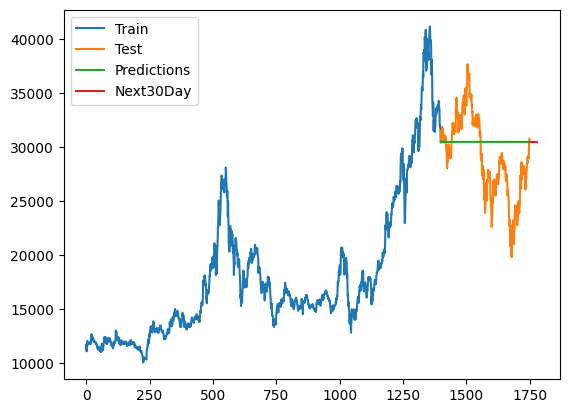

In [8]:
# 7. Tính RMSE, MAE, MSE
# valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
# print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)

# Calculate MAE
mae = np.mean(np.abs(y_pred - y_test))
print('Mean Absolute Error (MAE):', mae)

# Calculate MAPE
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print('Mean Absolute Percentage Error (MAPE):', mape)


# 8.Vẽ hình
plt.plot(train_data.index, train_data['Price'])
plt.plot(test_data.index, test_data['Price'])
plt.plot(test_data.index, y_pred)
# plt.plot(val_data.index, y_pred_val)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Next30Day'])
plt.show()

In [ ]:
test_data.index

RangeIndex(start=1225, stop=1575, step=1)

In [10]:
# 2. Đọc file dữ liệu chứng khoán và chia train test theo tỉ lệ 7:3
df1 = pd.read_csv('VTB.csv')
df1 = df1[['Price']]
df1 = df1.dropna() # Drop missing values
df1 = df1.reset_index(drop=True) # Reset the index

# Split the data into training, testing sets
train_size1 = int(0.7 * len(df))
test_size1 = int(0.3 * len(df))

train_data1 = df[:train_size1]
test_data1 = df[train_size1:train_size1+test_size1]


In [11]:
# 3. Quá trình Training
x_train1 = np.array(train_data1.index).reshape(-1, 1)
y_train1 = np.array(train_data1['Price'])

# Find the best ARIMA model using auto_arima
from pmdarima.arima import auto_arima
model1 = auto_arima(y_train1, trace=True, error_action='ignore', suppress_warnings=True)

# Fit the model
model1.fit(y_train1)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=18042.350, Time=1.24 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=18064.047, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=18058.834, Time=0.11 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=18060.055, Time=0.14 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=18063.155, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=18050.902, Time=0.76 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=18050.197, Time=0.54 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=18038.894, Time=1.58 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=18052.192, Time=0.83 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=18039.727, Time=1.89 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=6.13 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=18038.419, Time=1.37 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=18039.643, Time=1.09 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=18039.455, Time=3.09 sec
 ARIMA(1,1,4)(0,0,0)[0] i

ARIMA(order=(1, 1, 4), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [12]:
# 4. Quá trình testing
x_test1 = np.array(test_data1.index).reshape(-1, 1)
y_test1 = np.array(test_data1['Price'])
y_pred1 = model.predict(n_periods=len(y_test1)+30)

In [13]:
# 5. Quá trình tạo index predict 30 ngày tiếp theo
last_index1 =  df1.index[-1]
last_data1 = pd.RangeIndex(start=last_index1, stop=last_index1+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
# x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
# y_next_30_days = model.predict(n_periods=len(x_next_30_days))

# Predict the closing prices for the next 30 days
y_next_30_days1 = y_pred1[-30:]
y_pred1 = y_pred1[:-30]

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days1)

Predicted closing prices for the next 30 days:
[30467.89628654 30467.89628654 30467.89628654 30467.89628654
 30467.89628654 30467.89628654 30467.89628654 30467.89628654
 30467.89628654 30467.89628654 30467.89628654 30467.89628654
 30467.89628654 30467.89628654 30467.89628654 30467.89628654
 30467.89628654 30467.89628654 30467.89628654 30467.89628654
 30467.89628654 30467.89628654 30467.89628654 30467.89628654
 30467.89628654 30467.89628654 30467.89628654 30467.89628654
 30467.89628654 30467.89628654]


In [14]:
# 6. Đánh giá độ chính xác test
# valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))
test_rmse1 = np.sqrt(np.mean((y_pred1 - y_test1)**2))
# print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse1)

Testing RMSE: 4248.830825760862


Testing RMSE: 4248.830825760862
Mean Absolute Error (MAE): 3464.9831516111044
Mean Absolute Percentage Error (MAPE): 11.988257675628724


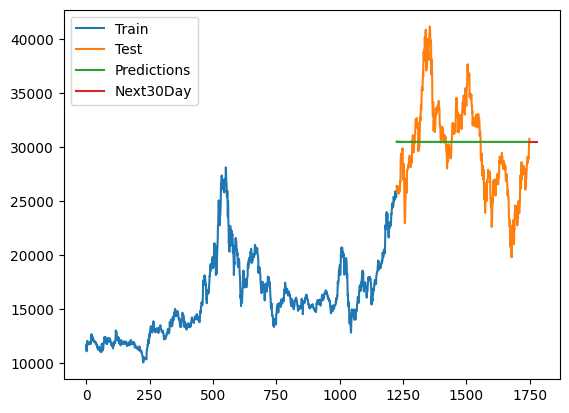

In [15]:
# 7. Tính RMSE
# valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))
test_rmse1 = np.sqrt(np.mean((y_pred1 - y_test1)**2))
# print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse1)

# Calculate MAE
mae1 = np.mean(np.abs(y_pred1 - y_test1))
print('Mean Absolute Error (MAE):', mae1)

# Calculate MAPE
mape1 = np.mean(np.abs((y_test1 - y_pred1) / y_test1)) * 100
print('Mean Absolute Percentage Error (MAPE):', mape1)

# 8.Vẽ hình
plt.plot(train_data1.index, train_data1['Price'])
plt.plot(test_data1.index, test_data1['Price'])
plt.plot(test_data1.index, y_pred1)
plt.plot(last_data1,y_next_30_days1)
plt.legend(['Train', 'Test', 'Predictions','Next30Day'])
plt.show()

In [16]:
# 2. Đọc file dữ liệu chứng khoán và chia train test theo tỉ lệ 9:1
df2 = pd.read_csv('VTB.csv')
df2 = df2[['Price']]
df2 = df2.dropna() # Drop missing values
df2 = df2.reset_index(drop=True) # Reset the index

# Split the data into training, testing sets
train_size2 = int(0.9 * len(df2))
test_size2 = int(0.1 * len(df2))

train_data2 = df2[:train_size2]
test_data2 = df2[train_size2:train_size2+test_size2]


In [17]:
# 3. Quá trình Training
x_train2 = np.array(train_data2.index).reshape(-1, 1)
y_train2 = np.array(train_data2['Price'])

# Find the best ARIMA model using auto_arima
from pmdarima.arima import auto_arima
model2 = auto_arima(y_train2, trace=True, error_action='ignore', suppress_warnings=True)

# Fit the model
model2.fit(y_train2)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=23955.740, Time=2.04 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=23959.139, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=23958.989, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=23959.105, Time=0.18 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=23957.539, Time=0.04 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=23953.743, Time=1.66 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=23959.978, Time=0.21 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=23951.857, Time=0.38 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=23953.790, Time=1.81 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=23959.677, Time=0.20 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=23950.175, Time=0.18 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=23957.543, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=23957.428, Time=0.07 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=23952.111, Time=0.65 sec
 ARIMA(1,1,2)(0,0,0

ARIMA(order=(1, 1, 1), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [18]:
# 4. Quá trình testing
x_test2 = np.array(test_data2.index).reshape(-1, 1)
y_test2 = np.array(test_data2['Price'])
y_pred2 = model.predict(n_periods=len(y_test2)+30)


In [19]:
# 5. Quá trình tạo index predict 30 ngày tiếp theo
last_index2 =  df2.index[-1]
last_data2 = pd.RangeIndex(start=last_index2, stop=last_index2+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
# x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
# y_next_30_days = model.predict(n_periods=len(x_next_30_days))

# Predict the closing prices for the next 30 days
y_next_30_days2 = y_pred2[-30:]
y_pred2 = y_pred2[:-30]

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days2)

Predicted closing prices for the next 30 days:
[30467.89310789 30467.89931862 30467.89339426 30467.89904546
 30467.89365484 30467.8987969  30467.89389193 30467.89857074
 30467.89410767 30467.89836495 30467.89430397 30467.8981777
 30467.89448258 30467.89800732 30467.8946451  30467.89785229
 30467.89479298 30467.89771123 30467.89492754 30467.89758288
 30467.89504998 30467.89746609 30467.89516138 30467.89735982
 30467.89526275 30467.89726313 30467.89535498 30467.89717514
 30467.89543891 30467.89709509]


In [20]:
# 6. Đánh giá độ chính xác test
# valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))
test_rmse2 = np.sqrt(np.mean((y_pred2 - y_test2)**2))
# print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse2)

Testing RMSE: 4876.04672598281


Testing RMSE: 4876.04672598281
Mean Absolute Error (MAE): 4310.951788135422
Mean Absolute Percentage Error (MAPE): 17.437520727059212


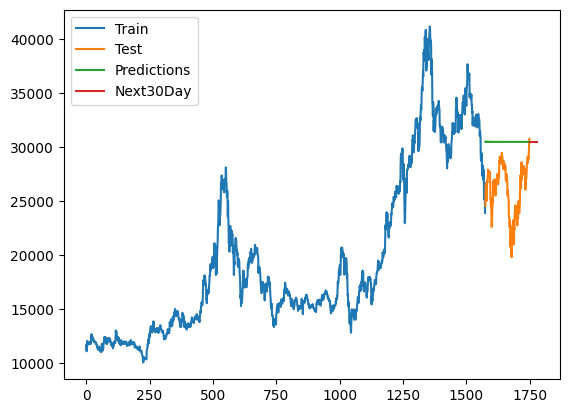

In [21]:
# 7. Tính RMSE
# valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))
test_rmse2 = np.sqrt(np.mean((y_pred2 - y_test2)**2))
# print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse2)

# Calculate MAE
mae2 = np.mean(np.abs(y_pred2 - y_test2))
print('Mean Absolute Error (MAE):', mae2)

# Calculate MAPE
mape2 = np.mean(np.abs((y_test2 - y_pred2) / y_test2)) * 100
print('Mean Absolute Percentage Error (MAPE):', mape2)

# 8.Vẽ hình
plt.plot(train_data2.index, train_data2['Price'])
plt.plot(test_data2.index, test_data2['Price'])
plt.plot(test_data2.index, y_pred2)
plt.plot(last_data2,y_next_30_days2)
plt.legend(['Train', 'Test', 'Predictions','Next30Day'])
plt.show()